In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
varied_param = 'consumer_external_interest_prob'
varied_param_legend_label = 'External Interest'
varied_param_x_label = 'Consumer External Interest'

In [4]:
num_influencers = 1
num_agents = 8

external_interests = list(np.linspace(1, 100, 10))

varied_param_values = external_interests

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=10,
    consumer_external_interest_prob=external_interests,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing influencer 8
Optimizing producer 0
Optimization succeeded using 2 iterations and 8 function evaluations.
Optimizing producer 1
Optimization succeeded using 3 iterations and 10 function evaluations.
Optimizing producer 2
Optimization succeeded using 2 iterations and 8 function evaluations.
Optimizing producer 3
Optimization succeeded using 3 iterations and 10 function evaluations.
Optimizing producer 4
Optimization succeeded using 3 iterations and 10 function evaluations.
Optimizing producer 5
Optimization succeeded using 4 iterations and 12 function evaluations.
Optimizing producer 6
Optimization succeeded using 4 iterations and 12 function evaluations.
Optimizing producer 7
Optimization succeeded using 3 iterations and 10 function evaluations.
Iteration 0 / 100 done in 0.33523791702464223 seconds.
Tot

In [6]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

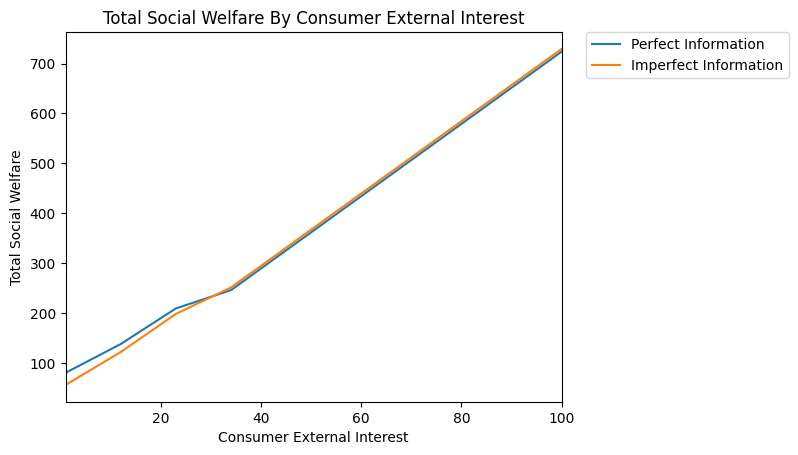

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

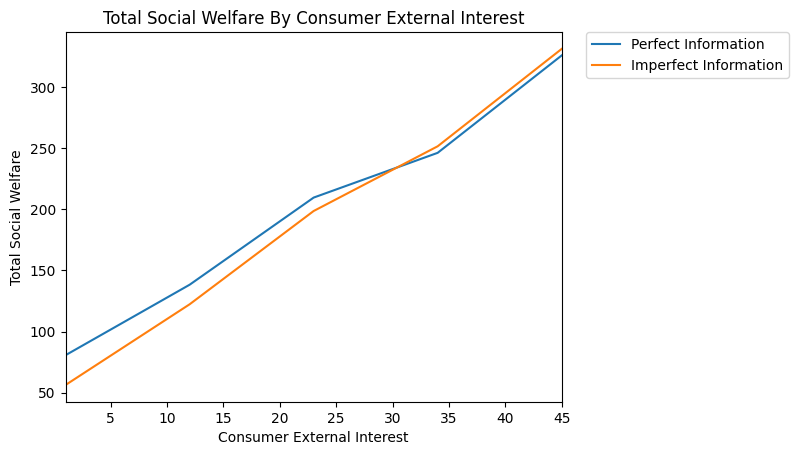

In [25]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats[0:5], imperfect_info_stats[0:5], 'total_social_welfare', varied_param_values[0:5], varied_param_x_label, 'Total Social Welfare')

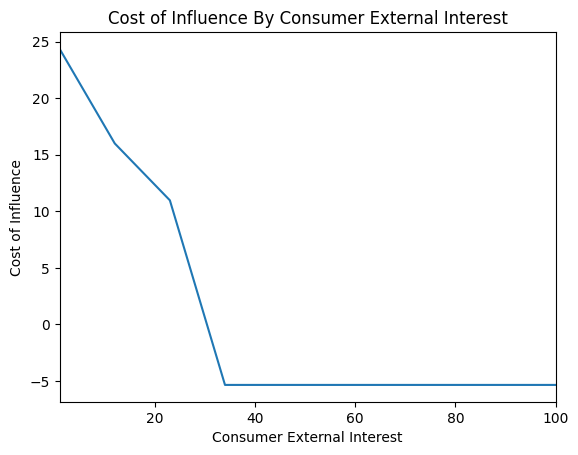

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

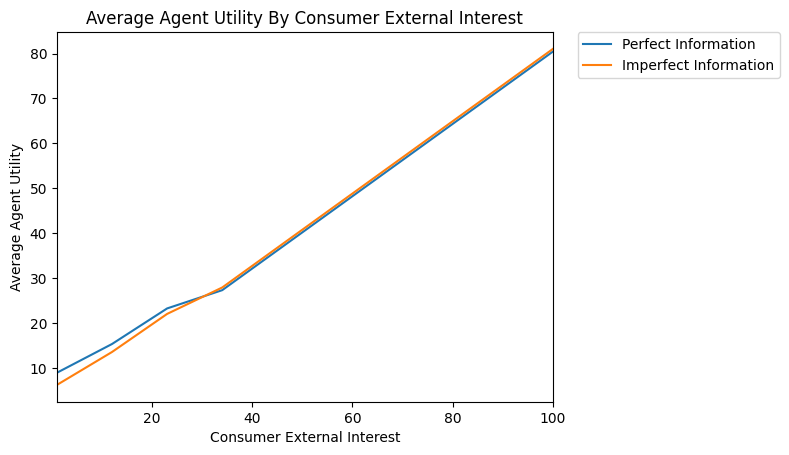

In [9]:
visualize.plot_ending_value_by_test(f"Average Agent Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_agent_utility', varied_param_values, varied_param_x_label, 'Average Agent Utility')

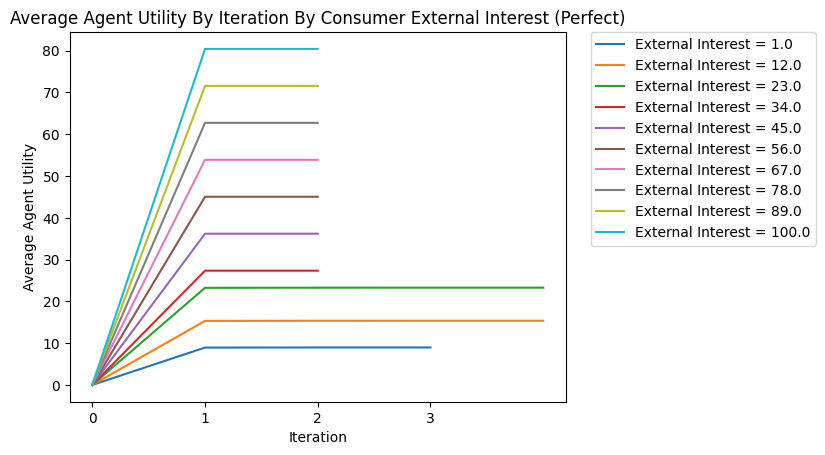

In [10]:
if len(perfect_info_stats) > 0:
    visualize.plot_value_by_iteration_by_test(f"Average Agent Utility By Iteration By {varied_param_x_label} (Perfect)", perfect_info_stats, 'average_agent_utility', varied_param_legend_label, varied_param_values, 'Average Agent Utility')

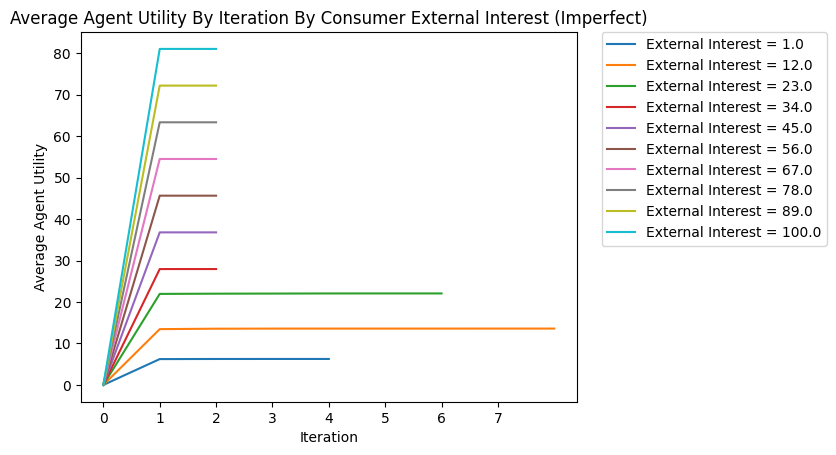

In [11]:
if len(imperfect_info_stats) > 0:
    visualize.plot_value_by_iteration_by_test(f"Average Agent Utility By Iteration By {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'average_agent_utility', varied_param_legend_label, varied_param_values, 'Average Agent Utility')

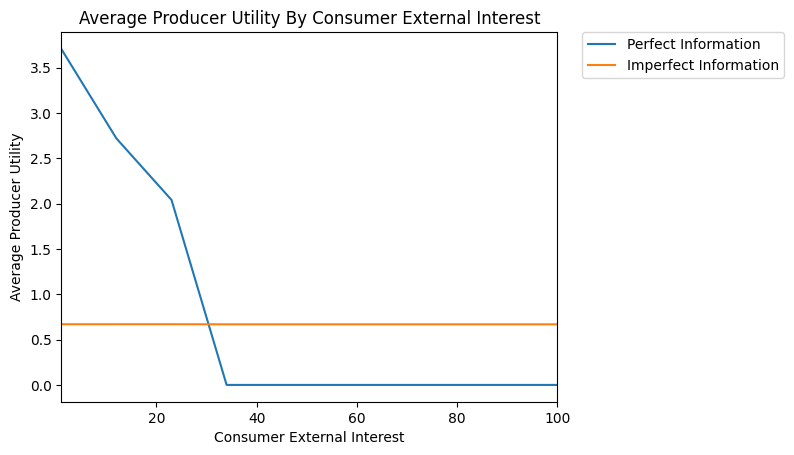

In [12]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

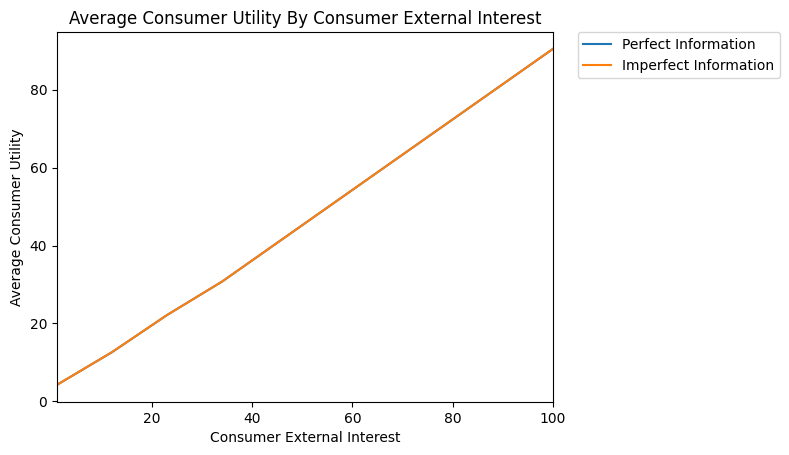

In [13]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

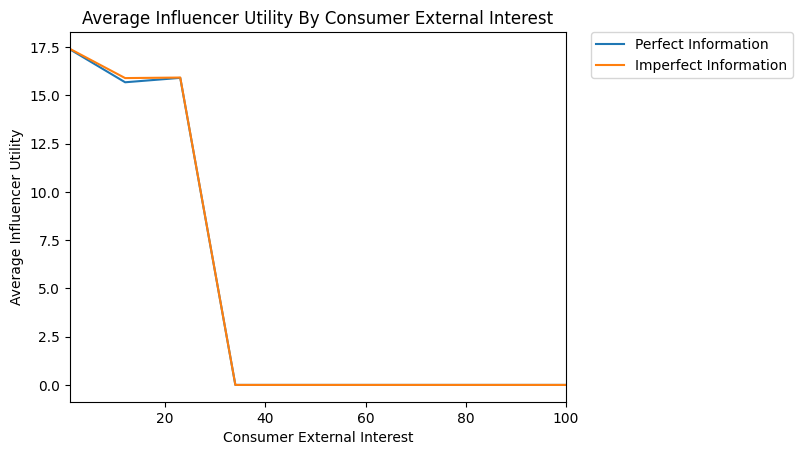

In [14]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

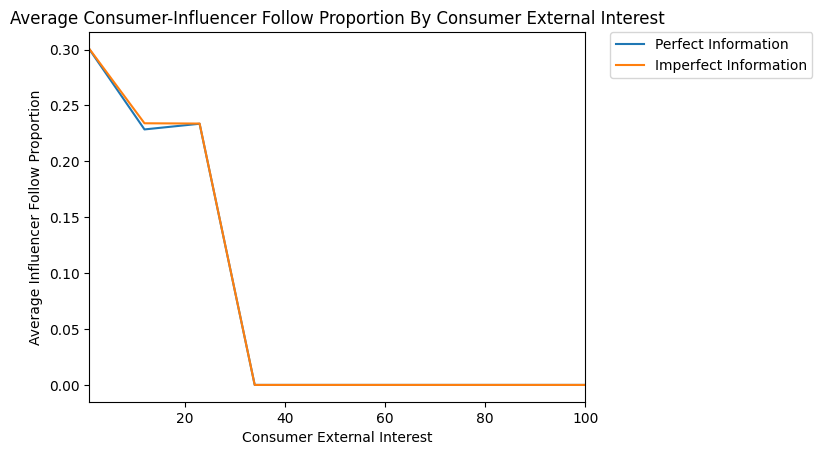

In [15]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

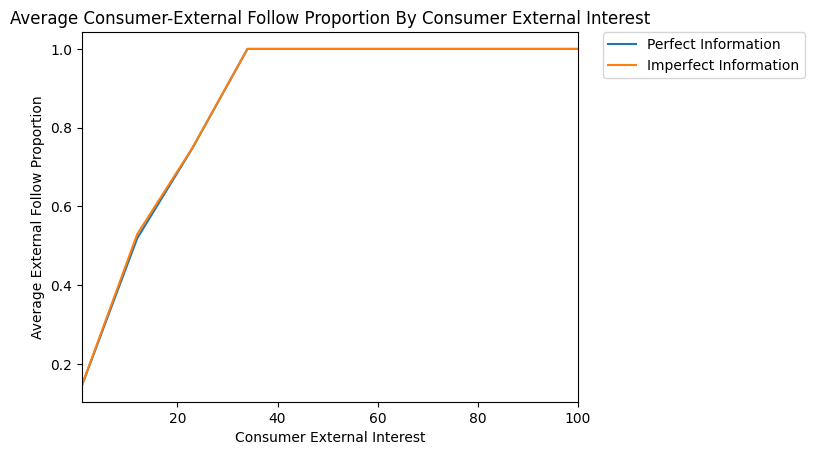

In [16]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

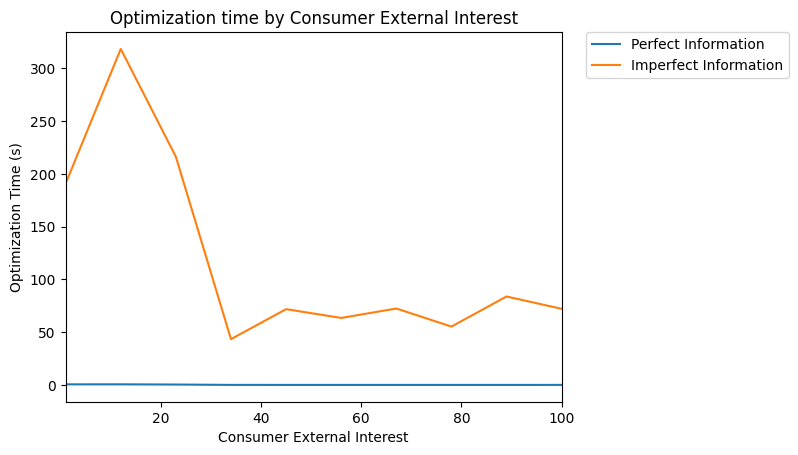

In [17]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

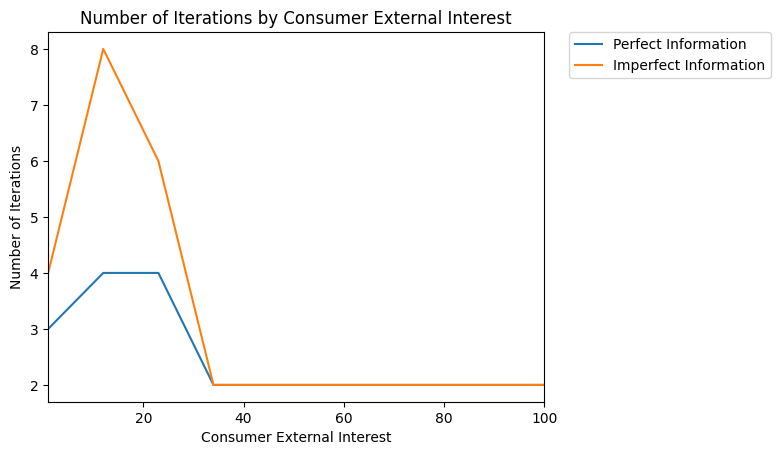

In [18]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

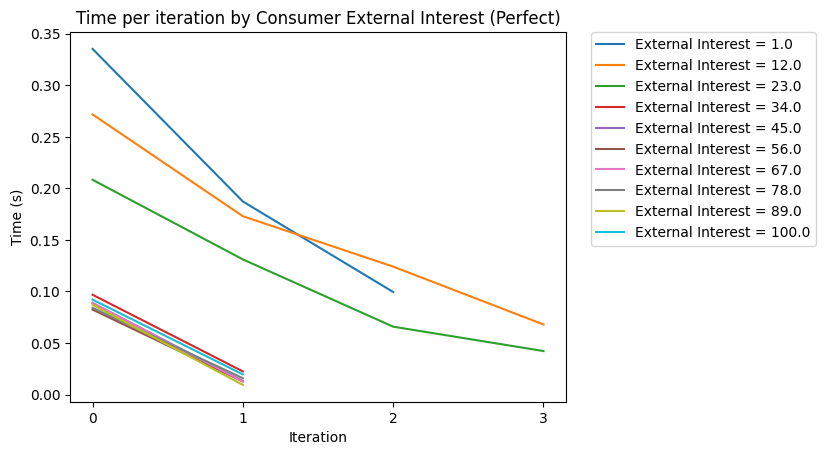

In [19]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

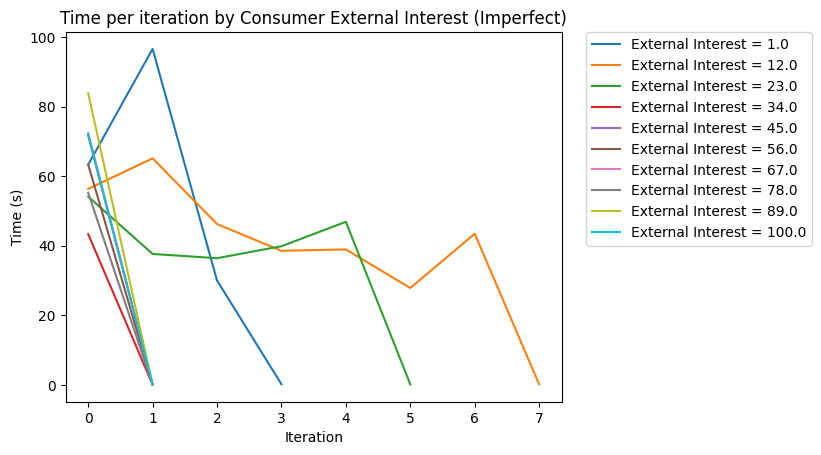

In [20]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

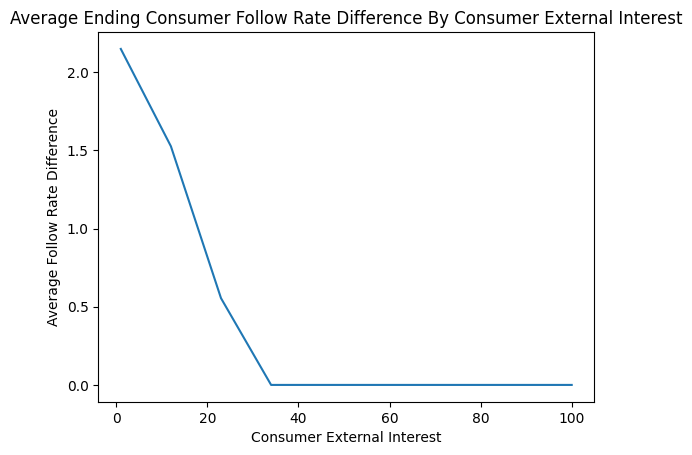

In [21]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

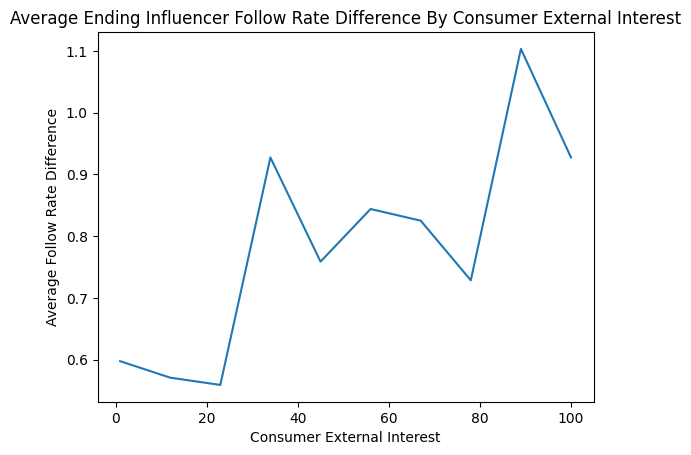

In [24]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

In [22]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 3, 'total_consumer_utility': [0, 33.57296673612952, 33.65563659995122, 33.65819449991839], 'total_producer_utility': [0, 29.516711192407644, 29.660077173206417, 29.66319816939117], 'total_influencer_utility': [0, 17.352381681068074, 17.37402895523523, 17.37861534453209], 'total_social_welfare': [0, 80.44205960960525, 80.68974272839287, 80.70000801384165], 'average_consumer_rate_change': [0, 2.5382366800963903, 0.18572436874502657, 0.05102727439281701], 'average_producer_topic_change': [0, 0.17635769015684152, 0.03929093626047851, 0.00454596932349567], 'average_influencer_rate_change': [0, 0.5882869975269408, 0.21158029206985934, 0.005736920613068664], 'average_consumer_utility_change': [0, 4.19662084201619, 0.010333732977712118, 0.000319737495895811], 'average_producer_utility_change': [0, 3.689588899050955, 0.017920747599847242, 0.00039012452309394874], 'average_influencer_utility_change': [0, 17.352381681068074, 0.021647274167154507, 0.004586389296861171], 'consume

In [23]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 4, 'total_consumer_utility': [0, 33.458770633962956, 33.560935214311, 33.57673238203596, 33.57847725908756], 'total_producer_utility': [0, 5.357226425284907, 5.357535408832502, 5.357535408832502, 5.357535408832502], 'total_influencer_utility': [0, 17.23146705772708, 17.38713606563409, 17.40461657596302, 17.404153415245407], 'total_social_welfare': [0, 56.04746411697494, 56.305606688777594, 56.33888436683148, 56.34016608316547], 'average_consumer_rate_change': [0, 2.5382366491271933, 0.17981322816102469, 0.08581476821546735, 0.04214388352645441], 'average_producer_topic_change': [0, 0.1444059475819944, 0.03454071548162712, 0.011139211253034744, 0.0], 'average_influencer_rate_change': [0, 0.5882868829472145, 0.22019773732386566, 0.07551415648812168, 0.0], 'average_consumer_utility_change': [0, 4.1823463292453695, 0.01277057254350572, 0.001974645965620081, 0.00021810963145046935], 'average_producer_utility_change': [0, 0.6696533031606133, 3.862294344929296e-05, 0.0, 0.0